# DAT-DEN-03 | Lab 16 Starter

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [26]:
data = pd.read_csv('../../datasets/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [28]:
store1_sales = data[data.Store == 1][['Weekly_Sales']].resample('W', 'sum')
store1_sales.head()

/Users/jg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

In [29]:
import seaborn as sns

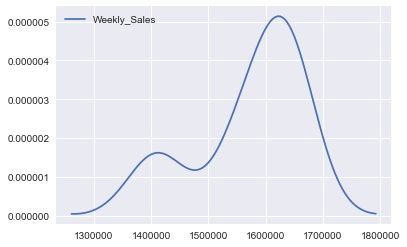

In [30]:
# TODO
plot_var = store1_sales[['Weekly_Sales']].rolling(window=1, center=True).mean().head()
sns.kdeplot(plot_var['Weekly_Sales'])

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [31]:
# TODO
store1_sales.Weekly_Sales.autocorr(lag=1)

0.30215827941131262

In [32]:
# TODO
store1_sales.Weekly_Sales.autocorr(lag=2)

0.12741313055390102

In [33]:
# TODO
store1_sales.Weekly_Sales.autocorr(lag=52)

0.89537602947770101

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [34]:
# TODO
train_rows_count = np.round(len(store1_sales.Weekly_Sales) * .75)
test_rows_count = len(store1_sales.Weekly_Sales) - train_rows_count
sum_rows = train_rows_count + test_rows_count
print ('train_set rows:\t%d') %train_rows_count,
print ('\ntest_set rows:\t%d') %test_rows_count,
print ('\nsum rows:\t%d') %sum_rows

train_set rows:	107 
test_set rows:	36 
sum rows:	143


In [35]:
type(train_rows_count)

numpy.float64

In [110]:
n = len(store1_sales.Weekly_Sales)

train_set = store1_sales.Weekly_Sales[:int(.75*n)]
test_set = store1_sales.Weekly_Sales[int(.75*n):]

In [111]:
# train_set = data.iloc[0:train_rows_count.astype(int), 2:3]
# test_set = data.iloc[train_rows_count.astype(int):, 2:3]

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [112]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [113]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error

In [114]:
# TODO
Weekly_sales_data = train_set.astype(float)
model = ARMA(Weekly_sales_data, (1, 0)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood               -1434.663
Method:                       css-mle   S.D. of innovations         160916.939
Date:                Wed, 10 Jan 2018   AIC                           2875.327
Time:                        11:46:33   BIC                           2883.345
Sample:                    02-07-2010   HQIC                          2878.577
                         - 02-19-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06   2.26e+04     68.293      0.000     1.5e+06    1.59e+06
ar.L1.Weekly_Sales     0.3147      0.093      3.399      0.001       0.133       0.496
                    

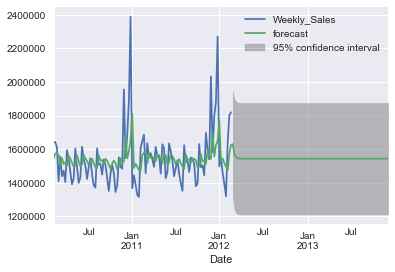

In [115]:

fig, ax = plt.subplots()
ax = train_set.plot(ax=ax)
fig = model.plot_predict(0, 200, ax=ax, plot_insample=False)

In [116]:
model.bse

const                 22604.955591
ar.L1.Weekly_Sales        0.092591
dtype: float64

In [117]:
model.sigma2

25894261345.247616

#### Plot the residuals - where are their significant errors.

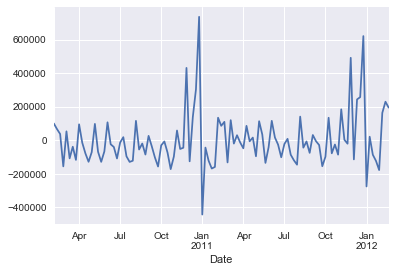

In [118]:
# TODO
model.resid.plot()

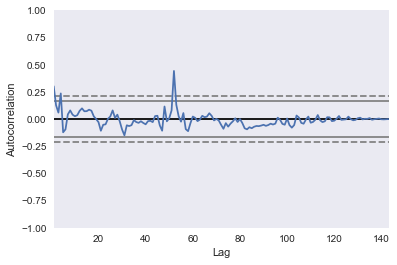

In [119]:
from pandas.plotting import autocorrelation_plot as acf
acf(store1_sales.Weekly_Sales)

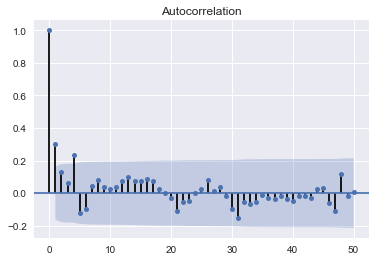

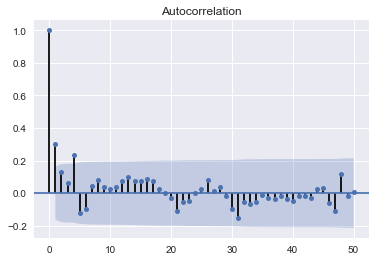

In [120]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(store1_sales.Weekly_Sales, lags=50)

In [121]:
# TODO

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [122]:
# TODO
Weekly_sales_data = train_set.astype(float)
model_2_0 = ARMA(Weekly_sales_data, (2, 0)).fit()
print model_2_0.summary()

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Wed, 10 Jan 2018   AIC                           2876.963
Time:                        11:47:00   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06    2.4e+04     64.349      0.000     1.5e+06    1.59e+06
ar.L1.Weekly_Sales     0.2974      0.097      3.075      0.003       0.108       0.487
ar.L2.Weekly_Sales  

In [123]:
# TODO
Weekly_sales_data = train_set.astype(float)
model_2_2 = ARMA(Weekly_sales_data, (2, 2)).fit()
print model_2_2.summary()

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 2)   Log Likelihood               -1425.781
Method:                       css-mle   S.D. of innovations         144110.440
Date:                Wed, 10 Jan 2018   AIC                           2863.563
Time:                        11:47:05   BIC                           2879.600
Sample:                    02-07-2010   HQIC                          2870.064
                         - 02-19-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06   1.92e+04     80.320      0.000    1.51e+06    1.58e+06
ar.L1.Weekly_Sales    -1.0398      0.090    -11.583      0.000      -1.216      -0.864
ar.L2.Weekly_Sales  

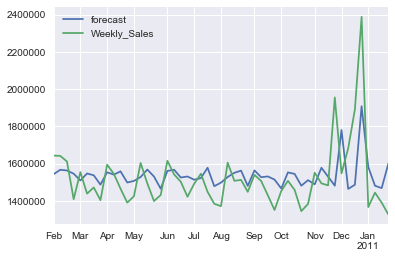

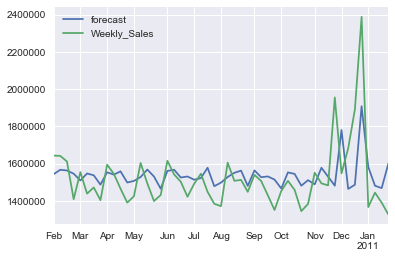

In [124]:
model_2_2.plot_predict(0,50)

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [125]:
from statsmodels.tsa.arima_model import ARIMA

In [126]:
# TODO
model_ARIMA = ARIMA(Weekly_sales_data, (1,0,1)).fit()
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(1, 1)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.523
Date:                Wed, 10 Jan 2018   AIC                           2876.964
Time:                        11:47:15   BIC                           2887.656
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.544e+06   2.43e+04     63.550      0.000     1.5e+06    1.59e+06
ar.L1.Weekly_Sales     0.4824      0.266      1.816      0.072      -0.038       1.003
ma.L1.Weekly_Sales    -0.1856      0.296     -0.627      0.532      -0.766       0.395
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0731           +0.0000j            2.0731            0.0000
MA.1            5.3890           +0.0000j            5.3890            0.0000
-----------------------------------------------------------------------------
"""

In [127]:
# Weekly_sales_data.diff(1).autocorr(1)
# store1_sales.Weekly_Sales.autocorr(lag=1)

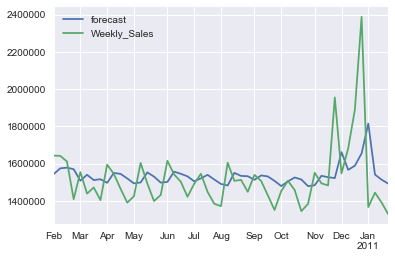

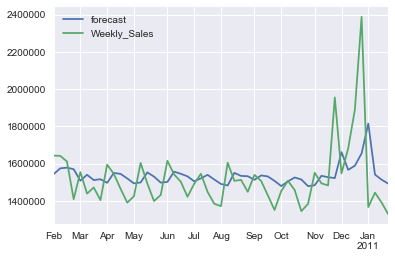

In [128]:
model_ARIMA.plot_predict(0,50)

In [129]:
predictions = model_ARIMA.predict(0,50)
mean_absolute_error(test_set.astype(float), predictions)

ValueError: Found input variables with inconsistent numbers of samples: [36, 51]

In [100]:
type(test_set)

pandas.core.frame.DataFrame

In [101]:
len(test_set)

421463

In [102]:
type(train_set)

pandas.core.frame.DataFrame

In [103]:
len(train_set)

107